# 0. Imports

## 0.1. Loading Libs

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2. Loading Data

In [5]:
df_raw = pd.read_csv(r'/Users/vitor.musachio/Documents/repos/notebooks/cardio_catch_diseases/datasets/cardio_train.csv', sep=';')
df_raw

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# 1. Data Description

In [6]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [8]:
print('Total rows: {}'. format(df1.shape[0]))
print('Total cols: {}'. format(df1.shape[1]))

Total rows: 70000
Total cols: 13


## 1.2. Check NA

In [9]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.3. Check Datatypes

In [10]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.4. Descriptive Statistical

In [13]:
# central tendency - mean, median
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(df1.apply(np.std)).T
d2 = pd.DataFrame(df1.apply(min)).T
d3 = pd.DataFrame(df1.apply(max)).T
d4 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.0,99999.0,99999.0,49972.419900,50001.5,28851.096242,-0.001278,-1.198374
1,age,10798.0,23713.0,12915.0,19468.865814,19703.0,2467.234044,-0.307055,-0.823447
2,gender,1.0,2.0,1.0,1.349571,1.0,0.476835,0.630960,-1.601935
3,height,55.0,250.0,195.0,164.359229,165.0,8.210068,-0.642187,7.943653
4,weight,10.0,200.0,190.0,74.205690,72.0,14.395654,1.012070,2.586825
5,ap_hi,-150.0,16020.0,16170.0,128.817286,120.0,154.010319,85.296214,7580.074738
6,ap_lo,-70.0,11000.0,11070.0,96.630414,80.0,188.471184,32.114083,1425.914585
7,cholesterol,1.0,3.0,2.0,1.366871,1.0,0.680245,1.587123,0.993901
8,gluc,1.0,3.0,2.0,1.226457,1.0,0.572266,2.397462,4.294377
9,smoke,0.0,1.0,1.0,0.088129,0.0,0.283482,2.905867,6.444250


/Users/vitor.musachio/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


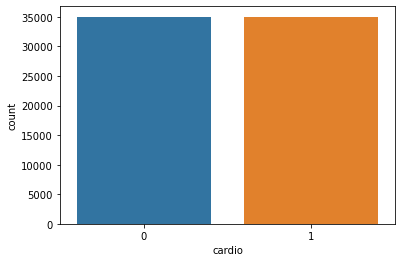

In [15]:
# response variable validation
sns.countplot(df1['cardio']);

# 2.0. Feature Engineering

In [39]:
df2 = df1.copy()

In [40]:
# getting age in years
df2['age'] = round(df2['age'] / 365)

# getting height in metters
df2['height'] = df2['height'] / 100

# creating body mass index variable
df2['bmi'] = df2['weight'] / df2['height'] **2

# body mass index classification
for i in range(len(df2)):
  if df2.loc[i,'bmi'] < 16.00:
    df2.loc[i,'bmi_class'] = 'underweight rate 3'
  elif (df2.loc[i,'bmi'] >= 16.00) and (df2.loc[i,'bmi'] <= 16.99):
    df2.loc[i,'bmi_class'] = 'underweight rate 2'
  elif (df2.loc[i,'bmi'] >= 17.00) and (df2.loc[i,'bmi'] <= 18.40):
    df2.loc[i,'bmi_class'] = 'underweight rate 1'
  elif (df2.loc[i,'bmi'] >= 18.50) and (df2.loc[i,'bmi'] <= 24.99):
    df2.loc[i,'bmi_class'] = 'normal'
  elif (df2.loc[i,'bmi'] >= 25.00) and (df2.loc[i,'bmi'] <= 29.99):
    df2.loc[i,'bmi_class'] = 'pre obese'
  elif (df2.loc[i,'bmi'] >= 30.00) <= (df2.loc[i,'bmi'] <= 34.99):
    df2.loc[i,'bmi_class'] = 'obese rate 1'
  elif (df2.loc[i,'bmi'] >= 35.00) and  (df2.loc[i,'bmi'] <= 39.99):
    df2.loc[i,'bmi_class'] = 'obese rate 2'
  else:
      df2.loc[i, 'bmi_class'] = 'obese rate 3'

In [41]:
df2.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,50.0,55.0,52.0,48.0,48.0
gender,2,1,1,2,1
height,1.68,1.56,1.65,1.69,1.56
weight,62.0,85.0,64.0,82.0,56.0
ap_hi,110,140,130,150,100
ap_lo,80,90,70,100,60
cholesterol,1,3,3,1,1
gluc,1,1,1,1,1
smoke,0,0,0,0,0


# 3.0. Exploratory Data Analysis

In [42]:
df3 = df2.copy()

## 3.1. Response Variable

In [46]:
# cardio ocurrences
cardio_true = len(df3.loc[df3['cardio'] == 1])
cardio_false = len(df3.loc[df3['cardio'] == 0])

print('Cardio positive cases: {0} ({1:2.2f}%)'.format(cardio_true, (cardio_true / (cardio_true + cardio_false)) * 100))
print('Cardio negative cases: {0} ({1:2.2f}%)'.format(cardio_false, (cardio_false / (cardio_false + cardio_true)) * 100))

Cardio positive cases: 34979 (49.97%)
Cardio negative cases: 35021 (50.03%)


## 3.2. Discrete Variables

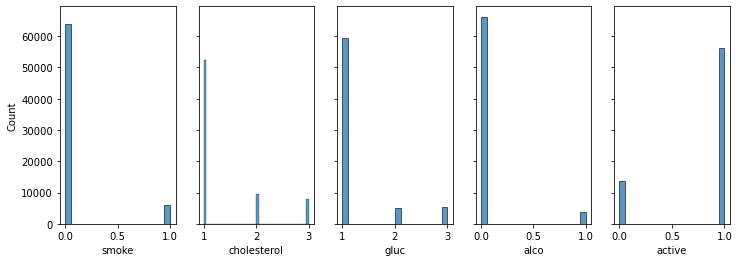

In [49]:
fig, axes = plt.subplots(1,5, figsize = (12,4), sharey=True)

# smoke
sns.histplot(ax=axes[0],data=df3['smoke']);

# cholesterol
sns.histplot(ax=axes[1],data=df3['cholesterol']);

# gluc
sns.histplot(ax=axes[2],data=df3['gluc']);

# alco
sns.histplot(ax=axes[3],data=df3['alco']);

# active
sns.histplot(ax=axes[4],data=df3['active']);

In [54]:
#df_aux = df3[['smoke','cholesterol','gluc','alco','active','cardio']]
#sns.pairplot(df_aux,hue='cardio')

## 3.3. Hypoteses Validation

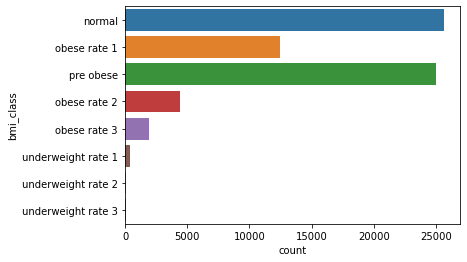

In [62]:
# Body Mass Index classification
sns.countplot(y="bmi_class", data=df3);

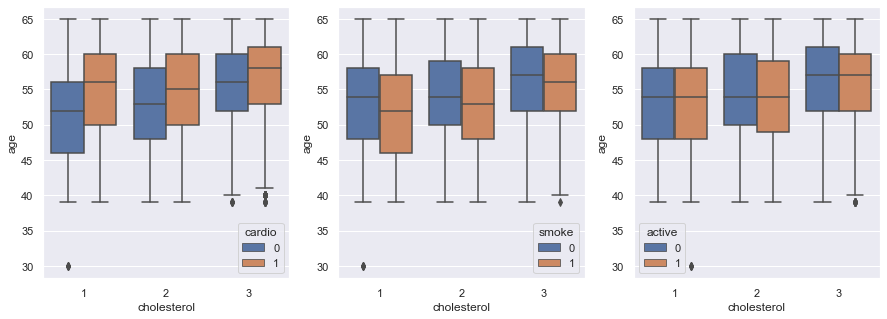

In [65]:
# validating age and cholesterol among patients with cardiovascular diseases, smokers and practitioners of physical activity

sns.set(rc={'figure.figsize':(15,5)})

# cardio
plt.subplot(1,3,1)
sns.boxplot(data=df3, y='age', x='cholesterol', hue='cardio');

# smoke
plt.subplot(1,3,2)
sns.boxplot(data=df3, y='age', x='cholesterol', hue='smoke');

# by active
plt.subplot(1,3,3)
sns.boxplot(data=df3, y='age', x='cholesterol', hue='active');

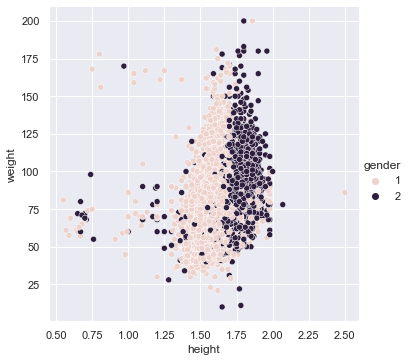

In [77]:
# distribution by height, weight and gender
sns.relplot(x='height', y='weight', hue='gender', data=df3);

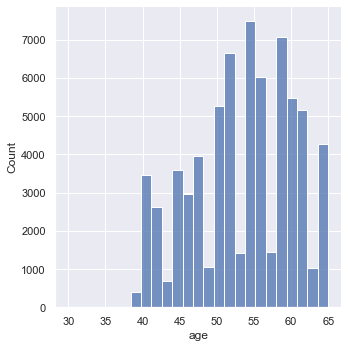

In [112]:
# age distribution
sns.displot(data=df3, x='age', bins=25);

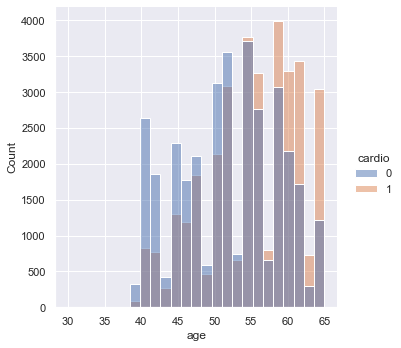

In [113]:
# age distribution by cardio diseases
sns.displot(data=df3, x='age', bins=25, hue='cardio');

## 3.4. Multivariated Analysis

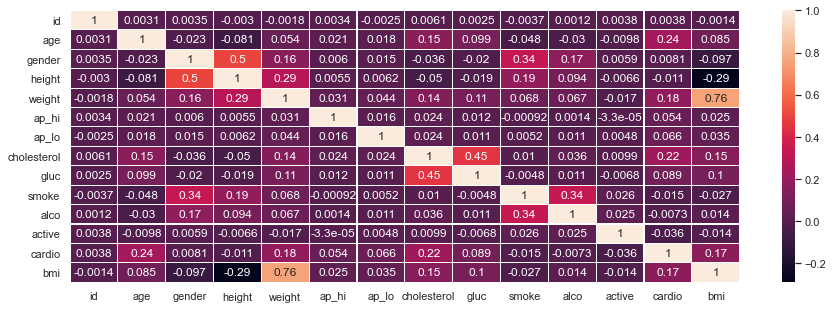

In [74]:
sns.heatmap(df3.corr(), linewidths=.1, annot = True)
plt.show()